In [1]:
import squidpy as sq

print(f"squidpy=={sq.__version__}")

squidpy==1.2.2


In [2]:
adata = sq.datasets.visium_hne_adata()
img = sq.datasets.visium_hne_image()
print(adata)
print(img)

100%|██████████| 314M/314M [00:05<00:00, 62.8MB/s] 
100%|██████████| 380M/380M [00:07<00:00, 52.8MB/s] 

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
ImageContainer[shape=(11757, 11291), layers=['image']]



/home/edo/micromamba/envs/env_squidpy122/lib/python3.9/site-packages/squidpy/im/_container.py:1371: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return self.data.dims["y"], self.data.dims["x"]


In the following line, we actually start Napari. You will notice that an additional window will pop up with the Napari viewer. We assign the Napari viewer to a new variable, viewer, in order to perform some useful manipulations, for instance taking screenshots. For users familiar with napari, the viewer is a wrapper of the napari.Viewer and not the same object.

In [3]:
viewer = img.interactive(adata)

We can always visualize the Napari session in this notebook, by conveniently capturing a screenshot of the current image. This can be done with viewer.screenshot(). All of the described functionalities are based on Napari layers and widget. You might want to familiarize yourself with some Napari tutorials.

Here, let’s take a screenshot of the canvas as well as the GUI with all the available widgets.


In [ ]:
viewer.screenshot(canvas_only=False)

In [ ]:
# this fails
image = sq.im.ImageContainer(adata.uns["spatial"]["V1_Adult_Mouse_Brain"]["images"]["hires"], scale=adata.uns["spatial"]["V1_Adult_Mouse_Brain"]["scalefactors"]["tissue_hires_scalef"])
viewer = image.interactive(adata)

In [4]:
# this works
image = sq.im.ImageContainer.from_adata(adata,
    img_key="hires",
    library_id="V1_Adult_Mouse_Brain"
)
viewer = image.interactive(adata)

sample read in a custom dataset from VisiumHD. Use as example the output from running stardist.

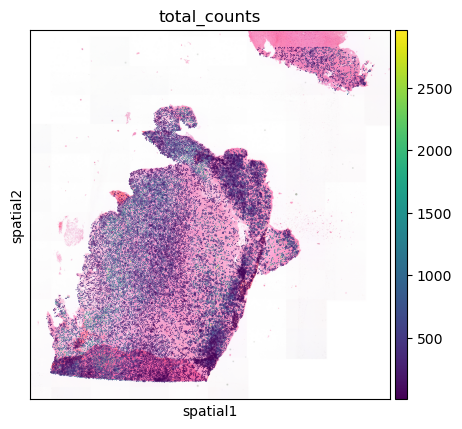

{'Sample_HDP031_C1_HE': {'images': {'hires': array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.

In [5]:
import scanpy as sc
test = sc.read_h5ad("../../../data/stardist/Sample_HDP031_C1_expanded_nuclei.h5ad")
sc.pl.spatial(test, color="total_counts")

print(test.uns["spatial"])

image2 = sq.im.ImageContainer.from_adata(test,
    img_key="hires",
    library_id="Sample_HDP031_C1_HE"
)

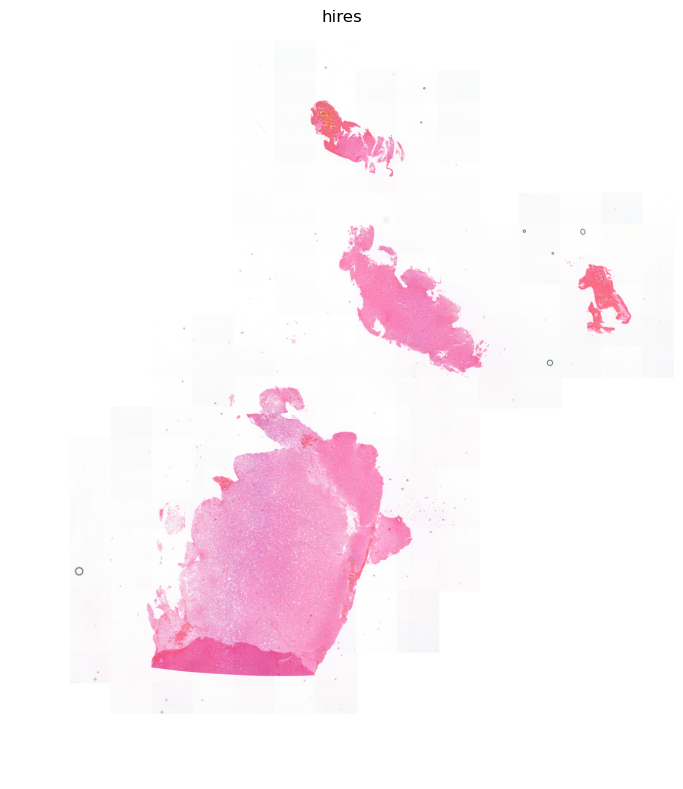

In [6]:
# Display the image
image2.show()

In [7]:
# from napari open the correct image
image2.interactive(test)

/home/edo/micromamba/envs/env_squidpy122/lib/python3.9/site-packages/squidpy/im/_container.py:1371: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return self.data.dims["y"], self.data.dims["x"]


Interactive view of ImageContainer[shape=(6000, 5314), layers=['hires']]

In [8]:
test.uns["spatial"]["Sample_HDP031_C1_HE"]["scalefactors"]

{'bin_size_um': 2.0,
 'fiducial_diameter_fullres': 1354.3048907599043,
 'microns_per_pixel': 0.24366743578311675,
 'regist_target_img_scalef': 0.11798714,
 'spot_diameter_fullres': 67.25793858811582,
 'tissue_hires_scalef': 0.11798714,
 'tissue_lowres_scalef': 0.011798714}

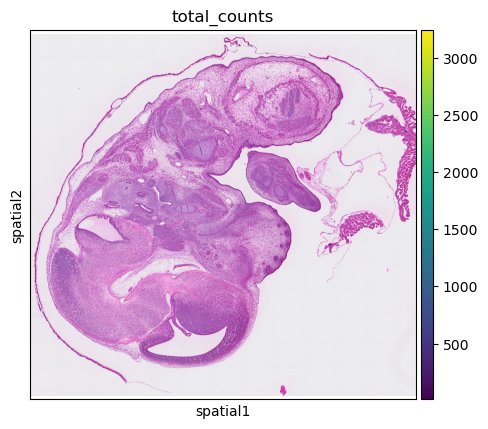

{'Visium_HD_Mouse_Embryo': {'images': {'hires': array([[[0.91764706, 0.9254902 , 0.9254902 ],
        [0.91764706, 0.92156863, 0.92941177],
        [0.92156863, 0.92156863, 0.9372549 ],
        ...,
        [0.92156863, 0.92156863, 0.9411765 ],
        [0.92941177, 0.91764706, 0.9372549 ],
        [0.9254902 , 0.9254902 , 0.93333334]],

       [[0.9254902 , 0.9254902 , 0.93333334],
        [0.92156863, 0.9254902 , 0.93333334],
        [0.92156863, 0.92156863, 0.93333334],
        ...,
        [0.9254902 , 0.9254902 , 0.9411765 ],
        [0.92941177, 0.92156863, 0.9372549 ],
        [0.9254902 , 0.9254902 , 0.92941177]],

       [[0.92156863, 0.91764706, 0.9411765 ],
        [0.92156863, 0.92156863, 0.93333334],
        [0.92156863, 0.91764706, 0.93333334],
        ...,
        [0.9254902 , 0.92156863, 0.9372549 ],
        [0.9254902 , 0.9254902 , 0.9372549 ],
        [0.9254902 , 0.92156863, 0.92941177]],

       ...,

       [[0.91764706, 0.91764706, 0.92156863],
        [0.92156863,

In [9]:
import scanpy as sc
test = sc.read_h5ad("/media/edo/Elements/training/test_snakemake/test_cosr_spatial/data/Mouse_Embryo/Mouse_Embryo_adata_final.h5ad")
sc.pl.spatial(test, color="total_counts")

print(test.uns["spatial"])

In [10]:
image2 = sq.im.ImageContainer.from_adata(test,
    img_key="hires",
    library_id="Visium_HD_Mouse_Embryo"
)

In [ ]:
viewer = image2.interactive(test)

Traceback (most recent call last):
  File "/home/edo/micromamba/envs/env_squidpy122/lib/python3.9/site-packages/squidpy/pl/_interactive/_widgets.py", line 41, in <lambda>
    self.itemDoubleClicked.connect(lambda item: self._onAction((item.text(),)))
  File "/home/edo/micromamba/envs/env_squidpy122/lib/python3.9/site-packages/squidpy/pl/_interactive/_widgets.py", line 146, in _onAction
    self._controller.add_points(vec, key=item, layer_name=name)
  File "/home/edo/micromamba/envs/env_squidpy122/lib/python3.9/site-packages/squidpy/pl/_interactive/_controller.py", line 187, in add_points
    self._hide_points_controls(layer, is_categorical=is_categorical_dtype(vec))
  File "/home/edo/micromamba/envs/env_squidpy122/lib/python3.9/site-packages/squidpy/pl/_interactive/_controller.py", line 307, in _hide_points_controls
    gl: QGridLayout = points_controls.grid_layout
AttributeError: 'QtPointsControls' object has no attribute 'grid_layout'
Traceback (most recent call last):
  File "/home/